In [1]:
####
## Celso Antonio Uliana Junior
## July 2 2020
####

import pandas as pd

#####
## Consuming and shaping the data to analysis
## Covid-19 numbers in Brazil by date
## Isolation percentage in Brazil by date
#####

data_raw_covid = pd.read_csv("C:/Users/PCDOMILHAO/Documents/GitHub/trab-siad/scripts/Python/Jupyter/dados/covidBrasil.csv", sep = ";", decimal = ",")
data_raw_isolation = pd.read_csv("C:/Users/PCDOMILHAO/Documents/GitHub/trab-siad/scripts/Python/Jupyter/dados/isolamento.csv", sep = ";", decimal = ",")
data_covid = data_raw_covid['Data'].values.copy()
data_covid = data_raw_covid.dropna().set_index("Data")
data_isolation = data_raw_isolation['Data'].values.copy()
data_isolation = data_raw_isolation.dropna().set_index("Data")

####
## Shaping a central pandas dataFrame for all our ML needs
####

data2 = data_covid
data2['Taxa'] = data_isolation['Taxa'].values.copy()


In [2]:
from sklearn.preprocessing import MinMaxScaler

####
## normalizing values for both covid and isolation percentage 
## between range [0,1] using sklearn MinMaxScaler
####

covid_norm = data_covid["Casos"].values.copy()
covid_norm.shape = (len(covid_norm), 1)

isolation_norm = data_isolation["Taxa"].values.copy()
isolation_norm.shape = (len(isolation_norm), 1)

####
## Shaping the central dataFrame with normalized values
####
min_max_scaler = MinMaxScaler()

covid_norm = min_max_scaler.fit_transform(covid_norm)
isolation_norm = min_max_scaler.fit_transform(isolation_norm)

data2["CasosNormalizados"] = covid_norm
data2["TaxaNormalizadas"] = isolation_norm
data = data2.copy()
#data = data.iloc[20:]
data.head(20)

,Casos,Taxa,CasosNormalizados,TaxaNormalizadas
Data,,,,
26/2/20,1,24.7,0.000018,0.000000
27/2/20,0,27.5,0.000000,0.074667
28/2/20,0,26.6,0.000000,0.050667
29/2/20,0,31.4,0.000000,0.178667
1/3/20,1,42,0.000018,0.461333
2/3/20,0,27.7,0.000000,0.080000
3/3/20,0,29,0.000000,0.114667
4/3/20,0,30.2,0.000000,0.146667
5/3/20,1,29.7,0.000018,0.133333


In [3]:
####
## Sliding window
####

df = pd.DataFrame()
window_size = 7
for i in range(0, window_size):
    df['E{}'.format(i)] = data['CasosNormalizados'].shift(-i)
    if(i == window_size - 1):
        for j in range(0, window_size):
             df['E{}'.format(j + i + 1)] = data['TaxaNormalizadas'].shift(-j)
        df['E{}'.format(window_size * 2 + 1)] = data['CasosNormalizados'].shift(-window_size)
df = df.iloc[:-window_size]
print(df)

               E0        E1        E2        E3        E4        E5        E6  \
Data                                                                            
26/2/20  0.000018  0.000000  0.000000  0.000000  0.000018  0.000000  0.000000   
27/2/20  0.000000  0.000000  0.000000  0.000018  0.000000  0.000000  0.000000   
28/2/20  0.000000  0.000000  0.000018  0.000000  0.000000  0.000000  0.000018   
29/2/20  0.000000  0.000018  0.000000  0.000000  0.000000  0.000018  0.000091   
1/3/20   0.000018  0.000000  0.000000  0.000000  0.000018  0.000091  0.000091   
...           ...       ...       ...       ...       ...       ...       ...   
10/6/20  0.585912  0.600920  0.555257  0.474375  0.396268  0.312392  0.376970   
11/6/20  0.600920  0.555257  0.474375  0.396268  0.312392  0.376970  0.637527   
12/6/20  0.555257  0.474375  0.396268  0.312392  0.376970  0.637527  0.587683   
13/6/20  0.474375  0.396268  0.312392  0.376970  0.637527  0.587683  0.415640   
14/6/20  0.396268  0.312392 

In [4]:
####
## Manipulating the data to split into X(a window size of values)
## and target, or Y, the value X "produces"
####

arr = df.values
#print(arr)


X = arr[:, : -1]
target = arr[:, -1]
print(X)
print(target)

[[1.82578372e-05 0.00000000e+00 0.00000000e+00 ... 4.61333333e-01
  8.00000000e-02 1.14666667e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.00000000e-02
  1.14666667e-01 1.46666667e-01]
 [0.00000000e+00 0.00000000e+00 1.82578372e-05 ... 1.14666667e-01
  1.46666667e-01 1.33333333e-01]
 ...
 [5.55257344e-01 4.74375126e-01 3.96268098e-01 ... 3.84000000e-01
  3.36000000e-01 3.68000000e-01]
 [4.74375126e-01 3.96268098e-01 3.12391594e-01 ... 3.36000000e-01
  3.68000000e-01 2.66666667e-01]
 [3.96268098e-01 3.12391594e-01 3.76969564e-01 ... 3.68000000e-01
  2.66666667e-01 3.84000000e-01]]
[0.00000000e+00 1.82578372e-05 9.12891859e-05 9.12891859e-05
 0.00000000e+00 2.19094046e-04 0.00000000e+00 1.64320535e-04
 3.28641069e-04 4.56445929e-04 3.83414581e-04 4.19930255e-04
 1.44236914e-03 6.20766464e-04 1.04069672e-03 2.50132369e-03
 3.52376258e-03 5.16696792e-03 4.08975553e-03 7.63177594e-03
 6.29895383e-03 5.65992952e-03 4.23581822e-03 8.80027752e-03
 9.16543426e-03 8.89156671e-03 6.4

In [5]:
####
## Config of the regressors and cross val cross val leave one out
####

from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict


loo = LeaveOneOut()

mlp = MLPRegressor(
    hidden_layer_sizes = (100, 50), alpha = 0.001,
    learning_rate_init = 0.01, max_iter = 1000,
    random_state = 9, tol = 0.0001, verbose = True)
svr = SVR(kernel = 'linear', C = 0.25, epsilon = 0.01, verbose = True, max_iter = 1000)
lr = LinearRegression()

full_predict_lr = cross_val_predict(lr, X, target, cv = 10)
full_predict_mlp = cross_val_predict(mlp, X, target, cv = loo)
full_predict_svr = cross_val_predict(svr, X, target, cv = loo)

Iteration 1, loss = 0.04895867
Iteration 2, loss = 0.08487725
Iteration 3, loss = 0.00535692
Iteration 4, loss = 0.03632832
Iteration 5, loss = 0.02033726
Iteration 6, loss = 0.00439384
Iteration 7, loss = 0.00921927
Iteration 8, loss = 0.01474418
Iteration 9, loss = 0.01190464
Iteration 10, loss = 0.00707400
Iteration 11, loss = 0.00387416
Iteration 12, loss = 0.00397519
Iteration 13, loss = 0.00582081
Iteration 14, loss = 0.00706859
Iteration 15, loss = 0.00664157
Iteration 16, loss = 0.00510470
Iteration 17, loss = 0.00367125
Iteration 18, loss = 0.00320628
Iteration 19, loss = 0.00376336
Iteration 20, loss = 0.00456340
Iteration 21, loss = 0.00473930
Iteration 22, loss = 0.00417600
Iteration 23, loss = 0.00339164
Iteration 24, loss = 0.00300625
Iteration 25, loss = 0.00331796
Iteration 26, loss = 0.00363594
Iteration 27, loss = 0.00359684
Iteration 28, loss = 0.00331761
Iteration 29, loss = 0.00303780
Iteration 30, loss = 0.00292291
Iteration 31, loss = 0.00299008
Iteration 32, los

Iteration 20, loss = 0.00454736
Iteration 21, loss = 0.00483245
Iteration 22, loss = 0.00432883
Iteration 23, loss = 0.00354723
Iteration 24, loss = 0.00304601
Iteration 25, loss = 0.00320190
Iteration 26, loss = 0.00357656
Iteration 27, loss = 0.00370048
Iteration 28, loss = 0.00351692
Iteration 29, loss = 0.00319052
Iteration 30, loss = 0.00295987
Iteration 31, loss = 0.00295598
Iteration 32, loss = 0.00306673
Iteration 33, loss = 0.00311981
Iteration 34, loss = 0.00307694
Iteration 35, loss = 0.00296462
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04889451
Iteration 2, loss = 0.08452060
Iteration 3, loss = 0.00535089
Iteration 4, loss = 0.03613080
Iteration 5, loss = 0.01977677
Iteration 6, loss = 0.00424588
Iteration 7, loss = 0.00916987
Iteration 8, loss = 0.01442482
Iteration 9, loss = 0.01170546
Iteration 10, loss = 0.00688039
Iteration 11, loss = 0.00379534
Iteration 12, loss = 0.00407322
Iteration 13, loss = 0.

Iteration 19, loss = 0.00456008
Iteration 20, loss = 0.00492546
Iteration 21, loss = 0.00446861
Iteration 22, loss = 0.00361616
Iteration 23, loss = 0.00307340
Iteration 24, loss = 0.00322167
Iteration 25, loss = 0.00363082
Iteration 26, loss = 0.00370401
Iteration 27, loss = 0.00346909
Iteration 28, loss = 0.00310309
Iteration 29, loss = 0.00289804
Iteration 30, loss = 0.00314985
Iteration 31, loss = 0.00307813
Iteration 32, loss = 0.00289221
Iteration 33, loss = 0.00282039
Iteration 34, loss = 0.00284728
Iteration 35, loss = 0.00286077
Iteration 36, loss = 0.00281615
Iteration 37, loss = 0.00276213
Iteration 38, loss = 0.00274147
Iteration 39, loss = 0.00274458
Iteration 40, loss = 0.00274065
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04874132
Iteration 2, loss = 0.08400745
Iteration 3, loss = 0.00549429
Iteration 4, loss = 0.03479488
Iteration 5, loss = 0.01967713
Iteration 6, loss = 0.00382330
Iteration 7, loss = 

Iteration 31, loss = 0.00293622
Iteration 32, loss = 0.00305418
Iteration 33, loss = 0.00305219
Iteration 34, loss = 0.00295283
Iteration 35, loss = 0.00281588
Iteration 36, loss = 0.00273023
Iteration 37, loss = 0.00272942
Iteration 38, loss = 0.00278132
Iteration 39, loss = 0.00282102
Iteration 40, loss = 0.00280214
Iteration 41, loss = 0.00272883
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04813867
Iteration 2, loss = 0.08048951
Iteration 3, loss = 0.00582904
Iteration 4, loss = 0.03422184
Iteration 5, loss = 0.02016352
Iteration 6, loss = 0.00436291
Iteration 7, loss = 0.00991332
Iteration 8, loss = 0.01544178
Iteration 9, loss = 0.01163587
Iteration 10, loss = 0.00631214
Iteration 11, loss = 0.00353424
Iteration 12, loss = 0.00434414
Iteration 13, loss = 0.00652045
Iteration 14, loss = 0.00756476
Iteration 15, loss = 0.00682054
Iteration 16, loss = 0.00512349
Iteration 17, loss = 0.00369105
Iteration 18, loss = 0.

Iteration 8, loss = 0.01552341
Iteration 9, loss = 0.01193933
Iteration 10, loss = 0.00675608
Iteration 11, loss = 0.00368470
Iteration 12, loss = 0.00413337
Iteration 13, loss = 0.00618768
Iteration 14, loss = 0.00747185
Iteration 15, loss = 0.00701846
Iteration 16, loss = 0.00540825
Iteration 17, loss = 0.00380447
Iteration 18, loss = 0.00315348
Iteration 19, loss = 0.00361652
Iteration 20, loss = 0.00449482
Iteration 21, loss = 0.00491454
Iteration 22, loss = 0.00447799
Iteration 23, loss = 0.00366551
Iteration 24, loss = 0.00309023
Iteration 25, loss = 0.00315838
Iteration 26, loss = 0.00361303
Iteration 27, loss = 0.00373025
Iteration 28, loss = 0.00347674
Iteration 29, loss = 0.00312208
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04842141
Iteration 2, loss = 0.08122213
Iteration 3, loss = 0.00543269
Iteration 4, loss = 0.03537941
Iteration 5, loss = 0.02011799
Iteration 6, loss = 0.00434992
Iteration 7, loss = 0.

Iteration 22, loss = 0.00303238
Iteration 23, loss = 0.00341989
Iteration 24, loss = 0.00383275
Iteration 25, loss = 0.00379254
Iteration 26, loss = 0.00334587
Iteration 27, loss = 0.00296065
Iteration 28, loss = 0.00301143
Iteration 29, loss = 0.00315111
Iteration 30, loss = 0.00298690
Iteration 31, loss = 0.00278442
Iteration 32, loss = 0.00272343
Iteration 33, loss = 0.00280125
Iteration 34, loss = 0.00278770
Iteration 35, loss = 0.00268386
Iteration 36, loss = 0.00261973
Iteration 37, loss = 0.00264335
Iteration 38, loss = 0.00266646
Iteration 39, loss = 0.00262028
Iteration 40, loss = 0.00255310
Iteration 41, loss = 0.00252806
Iteration 42, loss = 0.00254219
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04842102
Iteration 2, loss = 0.08134053
Iteration 3, loss = 0.00562197
Iteration 4, loss = 0.03495351
Iteration 5, loss = 0.02064616
Iteration 6, loss = 0.00443676
Iteration 7, loss = 0.00981585
Iteration 8, loss = 0

Iteration 1, loss = 0.04844161
Iteration 2, loss = 0.08156044
Iteration 3, loss = 0.00555759
Iteration 4, loss = 0.03486983
Iteration 5, loss = 0.02080512
Iteration 6, loss = 0.00448222
Iteration 7, loss = 0.00975837
Iteration 8, loss = 0.01555411
Iteration 9, loss = 0.01195761
Iteration 10, loss = 0.00676509
Iteration 11, loss = 0.00369299
Iteration 12, loss = 0.00414688
Iteration 13, loss = 0.00621172
Iteration 14, loss = 0.00750742
Iteration 15, loss = 0.00711402
Iteration 16, loss = 0.00556682
Iteration 17, loss = 0.00397004
Iteration 18, loss = 0.00319851
Iteration 19, loss = 0.00344942
Iteration 20, loss = 0.00426889
Iteration 21, loss = 0.00480933
Iteration 22, loss = 0.00465623
Iteration 23, loss = 0.00399582
Iteration 24, loss = 0.00331446
Iteration 25, loss = 0.00301153
Iteration 26, loss = 0.00323646
Iteration 27, loss = 0.00358712
Iteration 28, loss = 0.00365076
Iteration 29, loss = 0.00339983
Iteration 30, loss = 0.00304580
Iteration 31, loss = 0.00290180
Iteration 32, los

Iteration 7, loss = 0.00932262
Iteration 8, loss = 0.01507535
Iteration 9, loss = 0.01193521
Iteration 10, loss = 0.00699589
Iteration 11, loss = 0.00388028
Iteration 12, loss = 0.00410210
Iteration 13, loss = 0.00600321
Iteration 14, loss = 0.00735856
Iteration 15, loss = 0.00709655
Iteration 16, loss = 0.00561123
Iteration 17, loss = 0.00399453
Iteration 18, loss = 0.00316143
Iteration 19, loss = 0.00340301
Iteration 20, loss = 0.00420774
Iteration 21, loss = 0.00470317
Iteration 22, loss = 0.00455573
Iteration 23, loss = 0.00392682
Iteration 24, loss = 0.00327252
Iteration 25, loss = 0.00297520
Iteration 26, loss = 0.00317758
Iteration 27, loss = 0.00352072
Iteration 28, loss = 0.00360904
Iteration 29, loss = 0.00339802
Iteration 30, loss = 0.00307959
Iteration 31, loss = 0.00286389
Iteration 32, loss = 0.00288753
Iteration 33, loss = 0.00301091
Iteration 34, loss = 0.00304571
Iteration 35, loss = 0.00297893
Iteration 36, loss = 0.00286492
Iteration 37, loss = 0.00276825
Iteration 3

Iteration 11, loss = 0.00369674
Iteration 12, loss = 0.00396373
Iteration 13, loss = 0.00597748
Iteration 14, loss = 0.00735147
Iteration 15, loss = 0.00709125
Iteration 16, loss = 0.00564864
Iteration 17, loss = 0.00408229
Iteration 18, loss = 0.00321976
Iteration 19, loss = 0.00332752
Iteration 20, loss = 0.00407000
Iteration 21, loss = 0.00462670
Iteration 22, loss = 0.00454239
Iteration 23, loss = 0.00392557
Iteration 24, loss = 0.00323206
Iteration 25, loss = 0.00292466
Iteration 26, loss = 0.00318094
Iteration 27, loss = 0.00356178
Iteration 28, loss = 0.00361119
Iteration 29, loss = 0.00332486
Iteration 30, loss = 0.00297521
Iteration 31, loss = 0.00281369
Iteration 32, loss = 0.00291461
Iteration 33, loss = 0.00303462
Iteration 34, loss = 0.00301826
Iteration 35, loss = 0.00289431
Iteration 36, loss = 0.00276778
Iteration 37, loss = 0.00273710
Iteration 38, loss = 0.00279626
Iteration 39, loss = 0.00278685
Iteration 40, loss = 0.00271343
Iteration 41, loss = 0.00265531
Iteratio

Iteration 13, loss = 0.00768807
Iteration 14, loss = 0.00745903
Iteration 15, loss = 0.00583718
Iteration 16, loss = 0.00416798
Iteration 17, loss = 0.00341301
Iteration 18, loss = 0.00369863
Iteration 19, loss = 0.00451658
Iteration 20, loss = 0.00502540
Iteration 21, loss = 0.00479997
Iteration 22, loss = 0.00406079
Iteration 23, loss = 0.00330207
Iteration 24, loss = 0.00302705
Iteration 25, loss = 0.00330029
Iteration 26, loss = 0.00366067
Iteration 27, loss = 0.00371981
Iteration 28, loss = 0.00347251
Iteration 29, loss = 0.00312307
Iteration 30, loss = 0.00293677
Iteration 31, loss = 0.00305070
Iteration 32, loss = 0.00309850
Iteration 33, loss = 0.00298498
Iteration 34, loss = 0.00286179
Iteration 35, loss = 0.00282174
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04899734
Iteration 2, loss = 0.08411966
Iteration 3, loss = 0.00513747
Iteration 4, loss = 0.03459137
Iteration 5, loss = 0.02085147
Iteration 6, loss =

Iteration 12, loss = 0.00400594
Iteration 13, loss = 0.00590208
Iteration 14, loss = 0.00730828
Iteration 15, loss = 0.00712834
Iteration 16, loss = 0.00569514
Iteration 17, loss = 0.00406826
Iteration 18, loss = 0.00316987
Iteration 19, loss = 0.00332740
Iteration 20, loss = 0.00412198
Iteration 21, loss = 0.00465381
Iteration 22, loss = 0.00455952
Iteration 23, loss = 0.00397585
Iteration 24, loss = 0.00331392
Iteration 25, loss = 0.00297760
Iteration 26, loss = 0.00314920
Iteration 27, loss = 0.00350415
Iteration 28, loss = 0.00361801
Iteration 29, loss = 0.00342690
Iteration 30, loss = 0.00311087
Iteration 31, loss = 0.00289507
Iteration 32, loss = 0.00291200
Iteration 33, loss = 0.00302918
Iteration 34, loss = 0.00306696
Iteration 35, loss = 0.00300371
Iteration 36, loss = 0.00289611
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04904354
Iteration 2, loss = 0.08407009
Iteration 3, loss = 0.00518867
Iteration 4, loss

Iteration 34, loss = 0.00307287
Iteration 35, loss = 0.00300994
Iteration 36, loss = 0.00290213
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04900110
Iteration 2, loss = 0.08421588
Iteration 3, loss = 0.00497661
Iteration 4, loss = 0.03459564
Iteration 5, loss = 0.02130631
Iteration 6, loss = 0.00463895
Iteration 7, loss = 0.00903426
Iteration 8, loss = 0.01494923
Iteration 9, loss = 0.01211523
Iteration 10, loss = 0.00726965
Iteration 11, loss = 0.00400687
Iteration 12, loss = 0.00401533
Iteration 13, loss = 0.00581519
Iteration 14, loss = 0.00722003
Iteration 15, loss = 0.00708958
Iteration 16, loss = 0.00570596
Iteration 17, loss = 0.00409027
Iteration 18, loss = 0.00317226
Iteration 19, loss = 0.00331519
Iteration 20, loss = 0.00409888
Iteration 21, loss = 0.00462091
Iteration 22, loss = 0.00452305
Iteration 23, loss = 0.00394368
Iteration 24, loss = 0.00329414
Iteration 25, loss = 0.00295956
Iteration 26, loss = 0.

Iteration 4, loss = 0.03429744
Iteration 5, loss = 0.02089301
Iteration 6, loss = 0.00455608
Iteration 7, loss = 0.00893662
Iteration 8, loss = 0.01472619
Iteration 9, loss = 0.01197084
Iteration 10, loss = 0.00711105
Iteration 11, loss = 0.00386719
Iteration 12, loss = 0.00393325
Iteration 13, loss = 0.00579248
Iteration 14, loss = 0.00723838
Iteration 15, loss = 0.00712481
Iteration 16, loss = 0.00574408
Iteration 17, loss = 0.00411347
Iteration 18, loss = 0.00316120
Iteration 19, loss = 0.00325553
Iteration 20, loss = 0.00401102
Iteration 21, loss = 0.00453871
Iteration 22, loss = 0.00444838
Iteration 23, loss = 0.00386605
Iteration 24, loss = 0.00320056
Iteration 25, loss = 0.00289233
Iteration 26, loss = 0.00312717
Iteration 27, loss = 0.00348567
Iteration 28, loss = 0.00354059
Iteration 29, loss = 0.00326602
Iteration 30, loss = 0.00293965
Iteration 31, loss = 0.00279859
Iteration 32, loss = 0.00289545
Iteration 33, loss = 0.00300906
Iteration 34, loss = 0.00300871
Iteration 35, 

Iteration 3, loss = 0.00478796
Iteration 4, loss = 0.03419799
Iteration 5, loss = 0.02067027
Iteration 6, loss = 0.00471690
Iteration 7, loss = 0.00814642
Iteration 8, loss = 0.01380145
Iteration 9, loss = 0.01199048
Iteration 10, loss = 0.00734969
Iteration 11, loss = 0.00400876
Iteration 12, loss = 0.00385588
Iteration 13, loss = 0.00564405
Iteration 14, loss = 0.00709203
Iteration 15, loss = 0.00701122
Iteration 16, loss = 0.00564503
Iteration 17, loss = 0.00402786
Iteration 18, loss = 0.00311980
Iteration 19, loss = 0.00329730
Iteration 20, loss = 0.00407373
Iteration 21, loss = 0.00455489
Iteration 22, loss = 0.00441683
Iteration 23, loss = 0.00382123
Iteration 24, loss = 0.00318802
Iteration 25, loss = 0.00288322
Iteration 26, loss = 0.00305994
Iteration 27, loss = 0.00337055
Iteration 28, loss = 0.00346111
Iteration 29, loss = 0.00325750
Iteration 30, loss = 0.00294985
Iteration 31, loss = 0.00275010
Iteration 32, loss = 0.00276385
Iteration 33, loss = 0.00287103
Iteration 34, l

Iteration 6, loss = 0.00482942
Iteration 7, loss = 0.00851126
Iteration 8, loss = 0.01441189
Iteration 9, loss = 0.01222242
Iteration 10, loss = 0.00738705
Iteration 11, loss = 0.00398661
Iteration 12, loss = 0.00385156
Iteration 13, loss = 0.00569985
Iteration 14, loss = 0.00720343
Iteration 15, loss = 0.00717567
Iteration 16, loss = 0.00585146
Iteration 17, loss = 0.00422115
Iteration 18, loss = 0.00322014
Iteration 19, loss = 0.00327593
Iteration 20, loss = 0.00402001
Iteration 21, loss = 0.00455236
Iteration 22, loss = 0.00450047
Iteration 23, loss = 0.00396390
Iteration 24, loss = 0.00331520
Iteration 25, loss = 0.00293341
Iteration 26, loss = 0.00304005
Iteration 27, loss = 0.00340148
Iteration 28, loss = 0.00353337
Iteration 29, loss = 0.00333842
Iteration 30, loss = 0.00300995
Iteration 31, loss = 0.00279598
Iteration 32, loss = 0.00281662
Iteration 33, loss = 0.00292390
Iteration 34, loss = 0.00292438
Iteration 35, loss = 0.00281789
Iteration 36, loss = 0.00269387
Iteration 37

Iteration 4, loss = 0.03435660
Iteration 5, loss = 0.02104810
Iteration 6, loss = 0.00418175
Iteration 7, loss = 0.00526570
Iteration 8, loss = 0.01117712
Iteration 9, loss = 0.01144520
Iteration 10, loss = 0.00746266
Iteration 11, loss = 0.00352731
Iteration 12, loss = 0.00244598
Iteration 13, loss = 0.00371854
Iteration 14, loss = 0.00536419
Iteration 15, loss = 0.00590297
Iteration 16, loss = 0.00505426
Iteration 17, loss = 0.00349300
Iteration 18, loss = 0.00220697
Iteration 19, loss = 0.00186665
Iteration 20, loss = 0.00249585
Iteration 21, loss = 0.00312872
Iteration 22, loss = 0.00323507
Iteration 23, loss = 0.00283117
Iteration 24, loss = 0.00219771
Iteration 25, loss = 0.00177272
Iteration 26, loss = 0.00187941
Iteration 27, loss = 0.00216203
Iteration 28, loss = 0.00218312
Iteration 29, loss = 0.00198717
Iteration 30, loss = 0.00176674
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.04723676
Iteration 2, loss = 0

In [6]:
####
## Printing some metrics of the regressors
####

print('Mean Squared Error in LR: %s' %(metrics.mean_squared_error(target, full_predict_lr)))
print('Mean Squared Error in MLP: %s' %(metrics.mean_squared_error(target, full_predict_mlp)))
print('Mean Squared Error in SVR: %s' %(metrics.mean_squared_error(target, full_predict_svr)))

r_squared_lr = metrics.r2_score(target, full_predict_lr)
r_squared_mlp = metrics.r2_score(target, full_predict_mlp)
r_squared_svr = metrics.r2_score(target, full_predict_svr)

print('R² score in LR: %s' %(r_squared_lr))
print('R² score in MLP: %s' %(r_squared_mlp))
print('R² score in SVR: %s' %(r_squared_svr))

adjusted_r_squared_lr = 1 - (1 - r_squared_lr) * (len(target) - 1) / (len(target) - X.shape[1] - 1)
adjusted_r_squared_mlp = 1 - (1 - r_squared_mlp) * (len(target) - 1) / (len(target) - X.shape[1] - 1)
adjusted_r_squared_svr = 1 - (1 - r_squared_svr) * (len(target) - 1) / (len(target) - X.shape[1] - 1)

print('adjusted R² score in LR: %s' %(adjusted_r_squared_lr))
print('adjusted R² score in MLP: %s' %(adjusted_r_squared_mlp))
print('adjusted R² score in SVR: %s' %(adjusted_r_squared_svr))

Mean Squared Error in LR: 0.006598024911100442
Mean Squared Error in MLP: 0.005762317354408195
Mean Squared Error in SVR: 0.005986897033680813
R² score in LR: 0.8472614539448069
R² score in MLP: 0.8666073580382825
R² score in SVR: 0.8614085335191553
adjusted R² score in LR: 0.8247526155787784
adjusted R² score in MLP: 0.8469494950123452
adjusted R² score in SVR: 0.8409845279325044


In [7]:
####
## Filling lists with NaN so the len is the same across all lists 
## so that a graph can be generated
####

import numpy as np

values_to_add = list()
for i in range(0, window_size):
    values_to_add.append(float('NaN'))
    
full_predict_svr = np.insert(full_predict_svr, 0, values_to_add)
full_predict_svr.shape = (len(full_predict_svr), 1)
    
full_predict_mlp = np.insert(full_predict_mlp, 0, values_to_add)
full_predict_mlp.shape = (len(full_predict_mlp), 1)

full_predict_lr = np.insert(full_predict_lr, 0, values_to_add)
full_predict_lr.shape = (len(full_predict_lr), 1)

In [8]:
####
## Adding the data to plot 
####

data['Predict_lr'] = full_predict_lr
data['Predict_mlp'] = full_predict_mlp
data['Predict_svr'] = full_predict_svr
data

,Casos,Taxa,CasosNormalizados,TaxaNormalizadas,Predict_lr,Predict_mlp,Predict_svr
Data,,,,,,,
26/2/20,1,24.7,0.000018,0.000000,NaN,NaN,NaN
27/2/20,0,27.5,0.000000,0.074667,NaN,NaN,NaN
28/2/20,0,26.6,0.000000,0.050667,NaN,NaN,NaN
29/2/20,0,31.4,0.000000,0.178667,NaN,NaN,NaN
1/3/20,1,42,0.000018,0.461333,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17/6/20,34918,37.3,0.637527,0.336000,0.647398,0.550599,0.545715
18/6/20,32188,38.5,0.587683,0.368000,0.710381,0.569856,0.625587
19/6/20,22765,34.7,0.415640,0.266667,0.605114,0.540465,0.562175


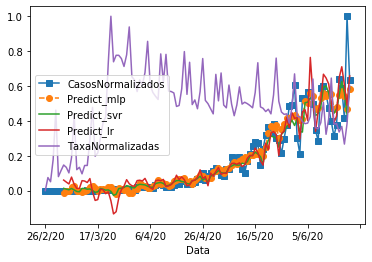

In [9]:
####
## Ploting the graph
####

import matplotlib.pyplot as plt
data.plot(y=['CasosNormalizados', 'Predict_mlp', 'Predict_svr', 'Predict_lr', 'TaxaNormalizadas'], style=['-s', '--o'])
plt.show()